# 📊 Análisis Exploratorio de Tipo de Cambio en Perú

**Autor:** Javier Uraco (@JavierAnthonyUS)  
**Fecha:** Diciembre 2025  
**Curso:** LP2 - UNALM

Este notebook analiza los datos extraídos de las 3 fuentes de tipo de cambio:
- **BCRP** (Banco Central de Reserva del Perú) - API oficial
- **Kambista** - Casa de cambio digital
- **Rextie** - Casa de cambio digital

In [1]:
# Importar librerías
import pandas as pd
import matplotlib.pyplot as plt
import os

# Configuración de gráficos
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 12

print("✅ Librerías importadas correctamente")

✅ Librerías importadas correctamente


In [2]:
# Cargar datos del CSV
ruta_csv = '../data/processed/tipo_cambio_historico.csv'
df = pd.read_csv(ruta_csv)

# Mostrar información básica
print(f"📊 Registros cargados: {len(df)}")
print(f"📅 Columnas: {list(df.columns)}")
print("\n🔍 Primeros registros:")
df.head()

📊 Registros cargados: 4
📅 Columnas: ['timestamp', 'tc_bcrp_compra', 'tc_bcrp_venta', 'tc_kambista_compra', 'tc_kambista_venta', 'tc_rextie_compra', 'tc_rextie_venta', 'spread_bcrp', 'spread_kambista', 'spread_rextie', 'mejor_compra', 'mejor_venta', 'cambio_detectado']

🔍 Primeros registros:


,timestamp,tc_bcrp_compra,tc_bcrp_venta,tc_kambista_compra,tc_kambista_venta,tc_rextie_compra,tc_rextie_venta,spread_bcrp,spread_kambista,spread_rextie,mejor_compra,mejor_venta,cambio_detectado
0,2025-12-13 10:00:00,3.7200,3.760,3.735,3.755,3.730,3.750,0.0400,0.020,0.02,Rextie,Kambista,True
1,2025-12-13 11:00:00,3.7200,3.760,3.736,3.756,3.731,3.751,0.0400,0.020,0.02,Rextie,Kambista,True
2,2025-12-13 12:00:00,3.7200,3.760,3.736,3.756,3.731,3.751,0.0400,0.020,0.02,Rextie,Kambista,False
3,2025-12-21 13:49:19,3.3666,3.363,3.330,3.486,3.351,3.391,-0.0036,0.156,0.04,BCRP,BCRP,True


## 📈 Comparación de Tipos de Cambio por Fuente

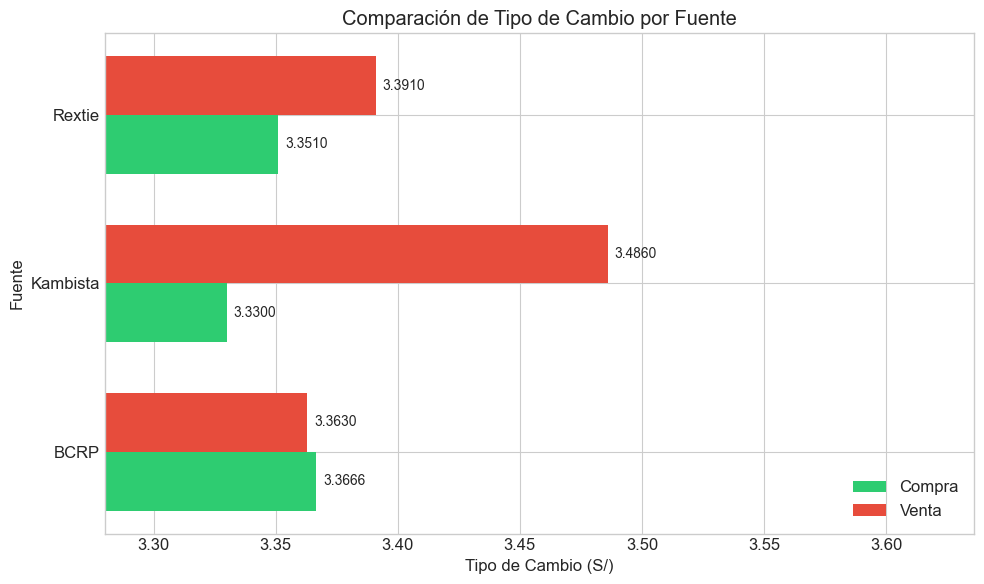


📅 Datos del: 2025-12-21 13:49:19


In [5]:
# Extraer último registro para comparación
ultimo = df.iloc[-1]

# Crear datos para el gráfico
fuentes = ['BCRP', 'Kambista', 'Rextie']
compra = [ultimo['tc_bcrp_compra'], ultimo['tc_kambista_compra'], ultimo['tc_rextie_compra']]
venta = [ultimo['tc_bcrp_venta'], ultimo['tc_kambista_venta'], ultimo['tc_rextie_venta']]

# Crear gráfico de barras horizontales (mejor para valores similares)
fig, ax = plt.subplots(figsize=(10, 6))

y = range(len(fuentes))
height = 0.35

bars1 = ax.barh([i - height/2 for i in y], compra, height, label='Compra', color='#2ecc71')
bars2 = ax.barh([i + height/2 for i in y], venta, height, label='Venta', color='#e74c3c')

ax.set_ylabel('Fuente')
ax.set_xlabel('Tipo de Cambio (S/)')
ax.set_title('Comparación de Tipo de Cambio por Fuente')
ax.set_yticks(y)
ax.set_yticklabels(fuentes)
ax.legend(loc='lower right')

# Ajustar límites para ver mejor las diferencias
all_values = compra + venta
ax.set_xlim(min(all_values) - 0.05, max(all_values) + 0.15)

# Agregar valores al final de las barras
for bar in bars1:
    width = bar.get_width()
    ax.annotate(f'{width:.4f}', xy=(width, bar.get_y() + bar.get_height()/2),
                xytext=(5, 0), textcoords="offset points", ha='left', va='center', fontsize=10)

for bar in bars2:
    width = bar.get_width()
    ax.annotate(f'{width:.4f}', xy=(width, bar.get_y() + bar.get_height()/2),
                xytext=(5, 0), textcoords="offset points", ha='left', va='center', fontsize=10)

plt.tight_layout()
plt.show()

print(f"\n📅 Datos del: {ultimo['timestamp']}")

## 💰 Análisis de Spreads (Diferencia Compra-Venta)

El spread representa la ganancia de la casa de cambio. Menor spread = mejor para el usuario.

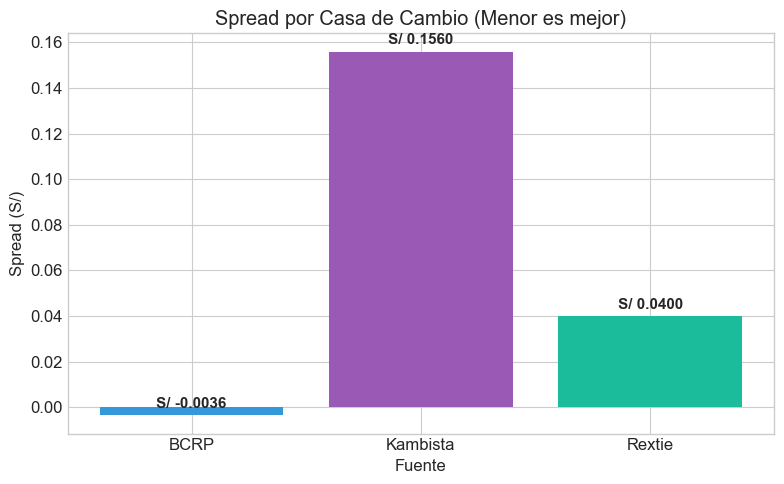


🏆 Mejor opción (menor spread positivo): Rextie


In [4]:
# Calcular spreads
spreads = {
    'BCRP': ultimo['tc_bcrp_venta'] - ultimo['tc_bcrp_compra'] if ultimo['tc_bcrp_venta'] and ultimo['tc_bcrp_compra'] else 0,
    'Kambista': ultimo['tc_kambista_venta'] - ultimo['tc_kambista_compra'] if ultimo['tc_kambista_venta'] and ultimo['tc_kambista_compra'] else 0,
    'Rextie': ultimo['tc_rextie_venta'] - ultimo['tc_rextie_compra'] if ultimo['tc_rextie_venta'] and ultimo['tc_rextie_compra'] else 0
}

# Gráfico de spreads
fig, ax = plt.subplots(figsize=(8, 5))
colors = ['#3498db', '#9b59b6', '#1abc9c']
bars = ax.bar(spreads.keys(), spreads.values(), color=colors)

ax.set_xlabel('Fuente')
ax.set_ylabel('Spread (S/)')
ax.set_title('Spread por Casa de Cambio (Menor es mejor)')

# Agregar valores
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'S/ {height:.4f}', xy=(bar.get_x() + bar.get_width()/2, height),
                xytext=(0, 3), textcoords="offset points", ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

# Mostrar mejor opción
mejor = min(spreads, key=lambda x: spreads[x] if spreads[x] > 0 else float('inf'))
print(f"\n🏆 Mejor opción (menor spread positivo): {mejor}")

## 🎯 Conclusiones

### Resumen del Análisis

In [7]:
# Resumen final
print("=" * 60)
print("   📊 RESUMEN DE ANÁLISIS DE TIPO DE CAMBIO")
print("=" * 60)

print(f"\n📅 Fecha de análisis: {ultimo['timestamp']}")

print("\n💱 TIPOS DE CAMBIO ACTUALES:")
print(f"   • BCRP:     Compra: S/ {ultimo['tc_bcrp_compra']}  |  Venta: S/ {ultimo['tc_bcrp_venta']}")
print(f"   • Kambista: Compra: S/ {ultimo['tc_kambista_compra']}  |  Venta: S/ {ultimo['tc_kambista_venta']}")
print(f"   • Rextie:   Compra: S/ {ultimo['tc_rextie_compra']}  |  Venta: S/ {ultimo['tc_rextie_venta']}")

print("\n🏆 RECOMENDACIONES:")
# Mejor para comprar USD (menor tasa de venta)
tasas_venta = {'BCRP': ultimo['tc_bcrp_venta'], 'Kambista': ultimo['tc_kambista_venta'], 'Rextie': ultimo['tc_rextie_venta']}
mejor_compra = min(tasas_venta, key=lambda x: tasas_venta[x] if tasas_venta[x] else float('inf'))

# Mejor para vender USD (mayor tasa de compra)
tasas_compra = {'BCRP': ultimo['tc_bcrp_compra'], 'Kambista': ultimo['tc_kambista_compra'], 'Rextie': ultimo['tc_rextie_compra']}
mejor_venta = max(tasas_compra, key=lambda x: tasas_compra[x] if tasas_compra[x] else 0)

print(f"   • Para COMPRAR dólares: {mejor_compra} (menor precio de venta)")
print(f"   • Para VENDER dólares: {mejor_venta} (mayor precio de compra)")

print("\n" + "=" * 60)
print("   Análisis realizado por: Javier Uraco,Fiorella Fuentes,Sebastian Fernandez- LP2 UNALM 2025")
print("=" * 60)

   📊 RESUMEN DE ANÁLISIS DE TIPO DE CAMBIO

📅 Fecha de análisis: 2025-12-21 13:49:19

💱 TIPOS DE CAMBIO ACTUALES:
   • BCRP:     Compra: S/ 3.3666  |  Venta: S/ 3.363
   • Kambista: Compra: S/ 3.33  |  Venta: S/ 3.486
   • Rextie:   Compra: S/ 3.351  |  Venta: S/ 3.391

🏆 RECOMENDACIONES:
   • Para COMPRAR dólares: BCRP (menor precio de venta)
   • Para VENDER dólares: BCRP (mayor precio de compra)

   Análisis realizado por: Javier Uraco,Fiorella Fuentes,Sebastian Fernandez- LP2 UNALM 2025
